## 1. Import libraries

In [228]:
import numpy as np
import pandas as pd
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load dataset

In [229]:
df = pd.read_csv('laptops.csv')

## 3. Explore data

In [230]:
df.head()

,name,brand,os,cpu_brand,cpu_name,cpu_type,cpu_cores,cpu_threads,gpu_brand,gpu_name,gpu_vram,ram_capacity,ram_ddr_type,hdd,ssd,screen_size,aspect_ratio_category,screen_res,ppi,touchscreen,spec_score,user_rating,price
0,hp omen 16-xd0017ax gaming laptop (amd ryzen 7...,hp,windows,amd,ryzen 7 7840hs,hs,8.0,16.0,nvidia,geforce rtx 4060,8.0,32.0,ddr5,0,1024,16.1,Standard (4:3 or 5:4),HD+,136.83,0,81,4.65,118490.0
1,hp 255 g10 laptop (amd ryzen 5 7520u/ 8gb/ 512...,hp,windows,amd,ryzen 5 7520u,u,4.0,8.0,amd,integrated,0.0,8.0,ddr4,0,512,15.6,Widescreen (16:10),SD,100.45,0,50,4.40,28990.0
2,hp victus 15-fa1319tx gaming laptop (13th gen ...,hp,windows,intel,core i5 13420h,h,8.0,12.0,nvidia,geforce rtx 4050,6.0,16.0,ddr4,0,512,15.6,Widescreen (16:10),HD+,141.21,0,61,4.55,68841.0
3,hp 15-fc0154au laptop (amd ryzen 3 7320u/ 8gb/...,hp,windows,amd,ryzen 3 7320u,u,4.0,8.0,amd,integrated,0.0,8.0,ddr5,0,512,15.6,Widescreen (16:10),HD+,141.21,0,57,4.70,30790.0
4,hp omen 16-wf1096tx gaming laptop (14th gen co...,hp,windows,intel,core i7 14650hx,hx,16.0,24.0,nvidia,geforce rtx 4060,8.0,16.0,ddr5,0,1024,16.1,Widescreen (16:10),HD+,136.83,0,79,4.40,109100.0


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6934 entries, 0 to 6933
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   6934 non-null   object 
 1   brand                  6934 non-null   object 
 2   os                     6934 non-null   object 
 3   cpu_brand              6930 non-null   object 
 4   cpu_name               6926 non-null   object 
 5   cpu_type               5077 non-null   object 
 6   cpu_cores              6470 non-null   float64
 7   cpu_threads            6028 non-null   float64
 8   gpu_brand              6516 non-null   object 
 9   gpu_name               6516 non-null   object 
 10  gpu_vram               6496 non-null   float64
 11  ram_capacity           6925 non-null   float64
 12  ram_ddr_type           6547 non-null   object 
 13  hdd                    6934 non-null   int64  
 14  ssd                    6934 non-null   int64  
 15  scre

In [232]:
df.describe()

,cpu_cores,cpu_threads,gpu_vram,ram_capacity,hdd,ssd,screen_size,ppi,touchscreen,spec_score,user_rating,price
count,6470.000000,6028.000000,6496.000000,6925.000000,6934.000000,6934.000000,6915.000000,6859.000000,6934.000000,6934.000000,6934.000000,6934.000000
mean,6.805719,10.978600,2.019704,12.281588,195.046438,496.326219,14.995949,154.484759,0.106288,57.002452,4.330785,80038.394866
std,4.346856,5.731858,3.135569,8.025333,394.607433,396.749179,1.112552,38.751409,0.308228,12.323310,0.309965,61765.611531
min,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.000000,83.210000,0.000000,7.000000,0.500000,6244.000000
25%,4.000000,8.000000,0.000000,8.000000,0.000000,256.000000,14.000000,141.210000,0.000000,50.000000,4.150000,40000.000000
50%,6.000000,12.000000,0.000000,8.000000,0.000000,512.000000,15.600000,141.210000,0.000000,57.000000,4.350000,62597.500000
75%,10.000000,16.000000,4.000000,16.000000,0.000000,512.000000,15.600000,157.350000,0.000000,65.000000,4.550000,95996.750000
max,24.000000,32.000000,24.000000,196.000000,2048.000000,6144.000000,18.400000,340.470000,1.000000,98.000000,5.000000,620990.000000


## 4. Data cleaning

In [233]:
df.drop(columns=['spec_score', 'user_rating'], inplace=True)
df.fillna({'cpu_type': 'NA'}, inplace=True)
df.dropna(inplace=True)

In [234]:
df['cpu_cores'] = df['cpu_cores'].astype(int)
df['cpu_threads'] = df['cpu_threads'].astype(int)
df['gpu_vram'] = df['gpu_vram'].astype(int)
df['ram_capacity'] = df['ram_capacity'].astype(int)

In [235]:
df['cpu_threads'] = df['cpu_threads'].astype(int)
df['gpu_vram'] = df['gpu_vram'].astype(int)
df['ram_capacity'] = df['ram_capacity'].astype(int)
df['price'] = df['price'].astype(int)

## 5. EDA

### Q1. What does the distribution of laptop prices look like?

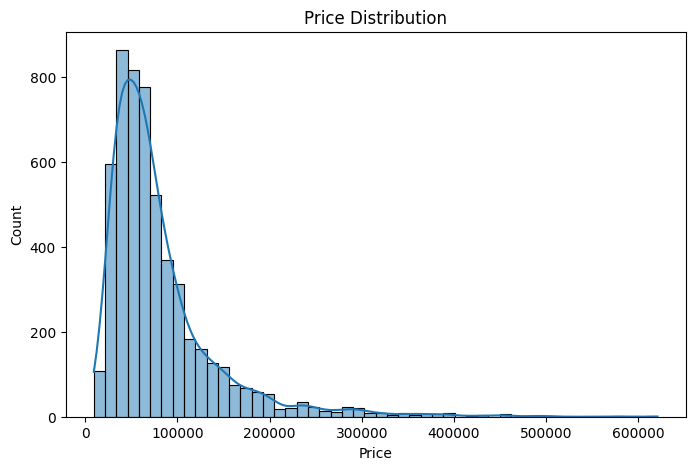

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

* The price distribution is right-skewed (positively skewed).

* This means that most laptops in the dataset are priced on the lower to mid-range, while there are fewer laptops priced very high, creating a long tail to the right.

* This skewness often happens because premium laptops with advanced specs or specialized gaming/ professional models cost significantly more, but are fewer in number.

* Knowing this helps when modeling price: sometimes a log transformation of the target variable (price) is used to normalize the distribution for better prediction accuracy.

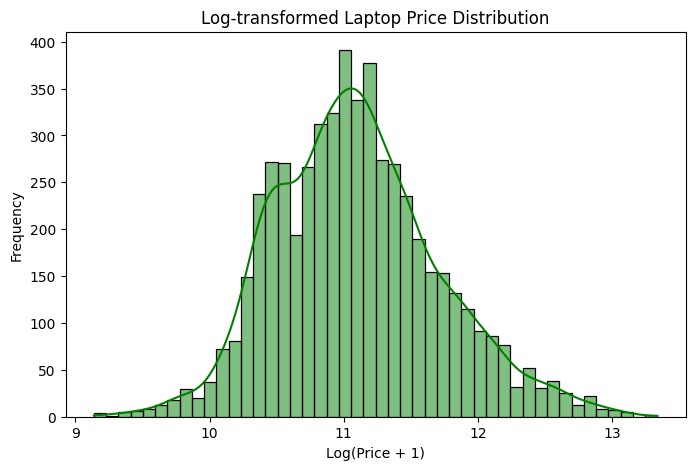

In [237]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['price']), kde=True, color='green')
plt.title('Log-transformed Laptop Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

After applying the logarithmic transformation to the price, the distribution became much closer to normal (bell-shaped). This means the spread of prices is more balanced, reducing the impact of extreme high prices. A more normal distribution often improves the performance of regression models and helps in better understanding the underlying patterns in price variations.

### Q2. How does the laptop price vary across different brand?

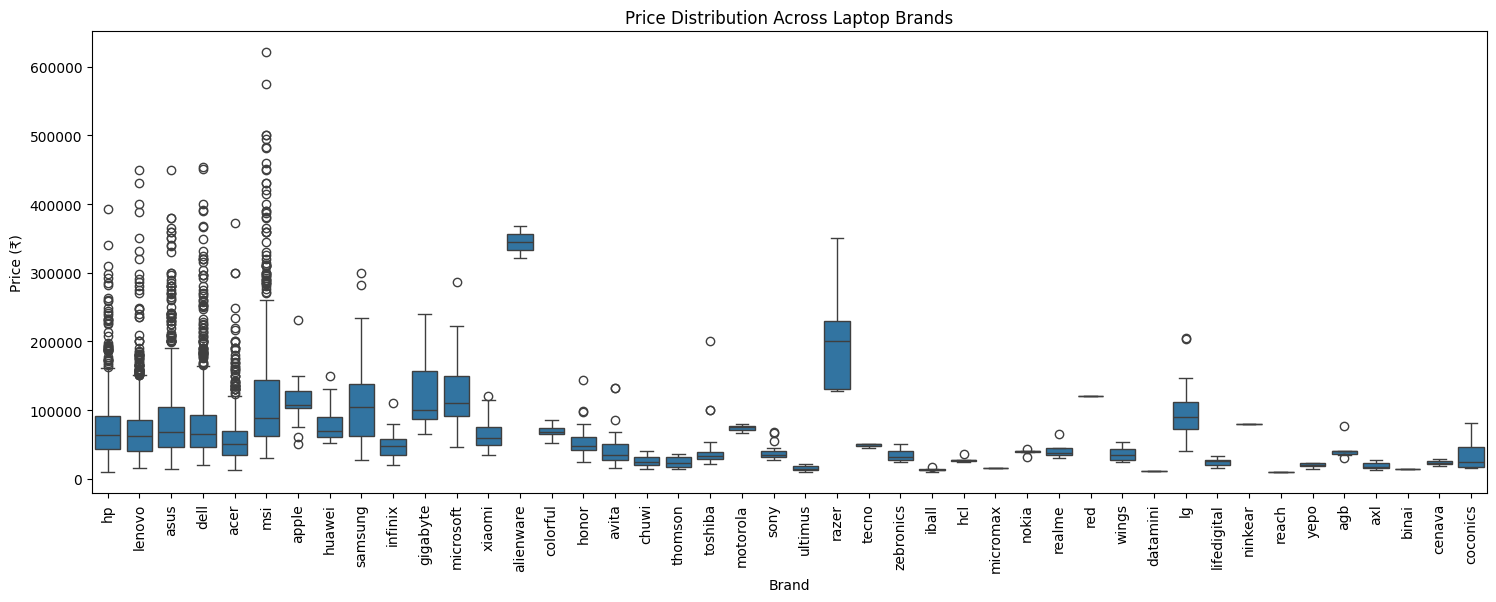

In [238]:
plt.figure(figsize=(18,6))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Laptop Brands')
plt.ylabel('Price (₹)')
plt.xlabel('Brand')
plt.show()

* The spread in boxplots per brand tells about price variability within that brand.
* The fact that the circles decrease on the right means high-priced laptops are rare and concentrated in fewer brands.

### Q3. How does RAM capacity affect the laptop price?

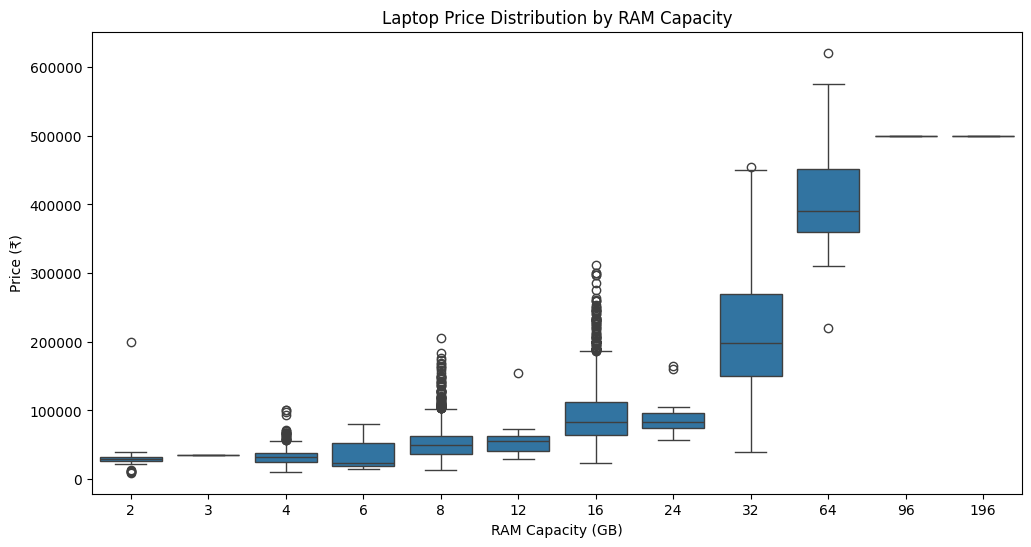

In [239]:
plt.figure(figsize=(12,6))
sns.boxplot(x='ram_capacity', y='price', data=df)
plt.title('Laptop Price Distribution by RAM Capacity')
plt.xlabel('RAM Capacity (GB)')
plt.ylabel('Price (₹)')
plt.show()

The longer height of the boxes for 32 and 64 GB RAM indicates that laptops with higher RAM have a wider range of prices. Some are very expensive, but there are also cheaper ones.

### Q4. What is the average laptop price by Brand, Operating System and RAM?

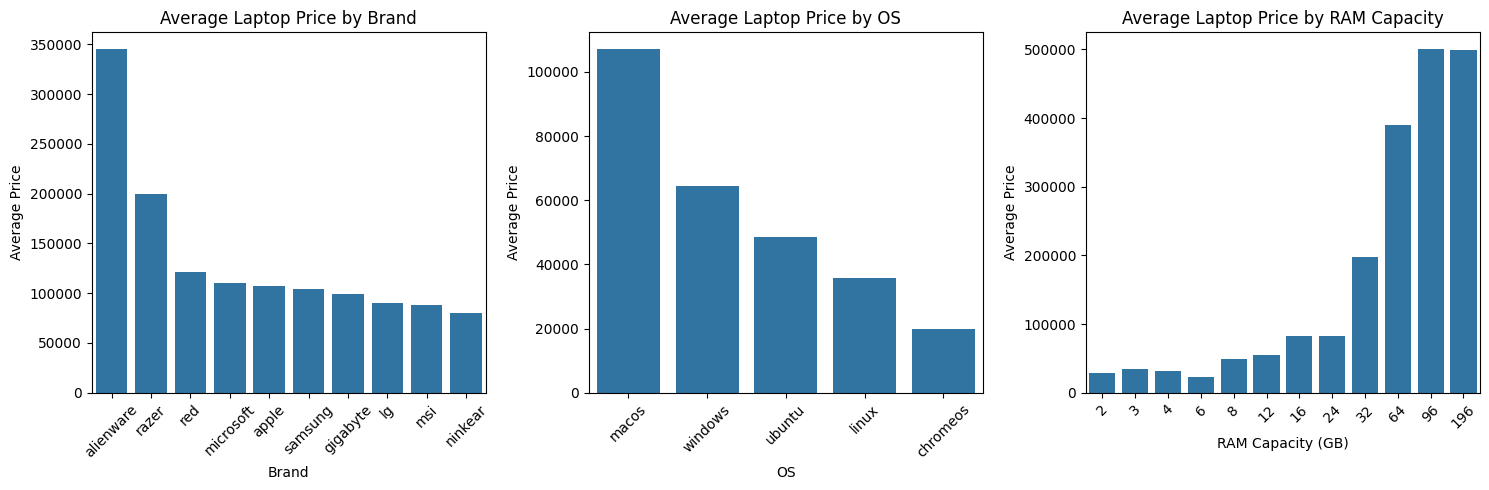

In [240]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 3 plots in 1 row

# Bar plot: Average price by Brand
avg_price_by_brand = df.groupby('brand')['price'].median().sort_values(ascending=False)[:10]
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, ax=axes[0])
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Average Price')
axes[0].set_title('Average Laptop Price by Brand')
axes[0].tick_params(axis='x', rotation=45)

# Bar plot: Average price by OS
avg_price_by_os = df.groupby('os')['price'].median().sort_values(ascending=False)
sns.barplot(x=avg_price_by_os.index, y=avg_price_by_os.values, ax=axes[1])
axes[1].set_xlabel('OS')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Average Laptop Price by OS')
axes[1].tick_params(axis='x', rotation=45)

# Bar plot: Average price by RAM capacity
avg_price_by_ram = df.groupby('ram_capacity')['price'].median().sort_index()
sns.barplot(x=avg_price_by_ram.index.astype(str), y=avg_price_by_ram.values, ax=axes[2])
axes[2].set_xlabel('RAM Capacity (GB)')
axes[2].set_ylabel('Average Price')
axes[2].set_title('Average Laptop Price by RAM Capacity')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Although some non-Apple laptop brands like Alienware, Razer, RED, and Microsoft exhibit high prices due to premium hardware or gaming focus, laptops running macOS consistently maintain a higher price range overall. This suggests that the macOS ecosystem carries a significant price premium compared to other operating systems, regardless of specific hardware configurations.
The RAM is most correlated to price as the RAM increases, the price also increases.

### Q5. How is touch screen laptops doing in the market?

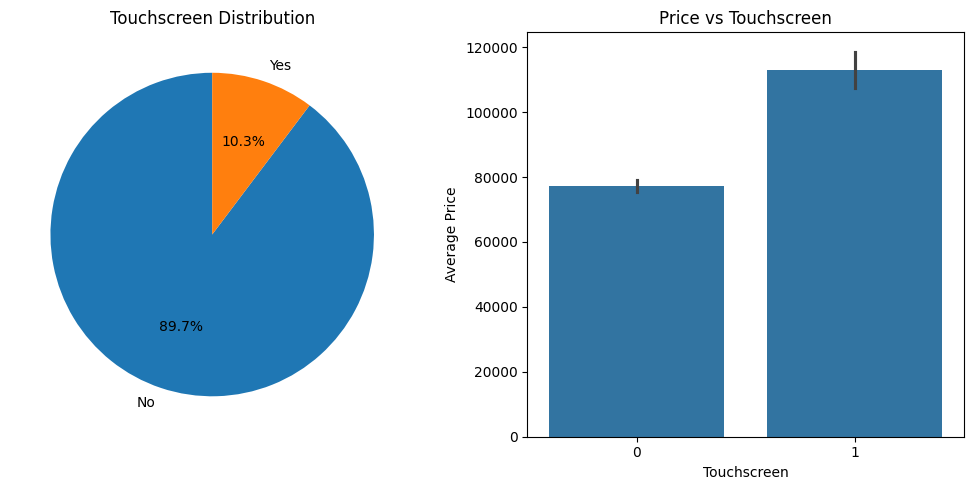

In [241]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 2 plots in 1 row

# Pie chart
df['touchscreen'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    labels=['No', 'Yes'],
    ax=axes[0]
)
axes[0].set_ylabel('')
axes[0].set_title('Touchscreen Distribution')

# Bar plot
sns.barplot(x='touchscreen', y='price', data=df, ax=axes[1])
axes[1].set_xlabel('Touchscreen')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Price vs Touchscreen')

plt.tight_layout()
plt.show()

89.7% of the laptops have a touchscreen whereas 10.3% do not.
This shows a high market presence of touchscreen laptops. However, the price for touchscreen laptops also tends to be higher, indicating that touchscreen capability is positioned as a premium feature, contributing to an increase in overall laptop cost.

### Q6. What is the correlation between numerical features in the dataset?

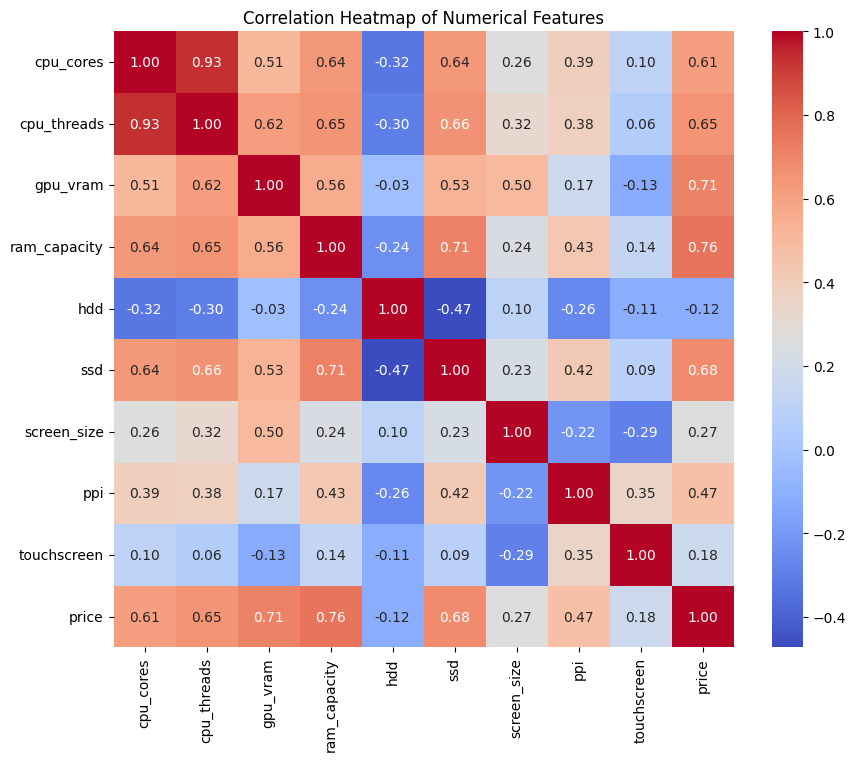

In [242]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**The heatmap shows the pairwise correlations between all numerical features in the dataset.**
* High positive correlations:
  * CPU cores and CPU threads are strongly correlated. This is expected because processors with more cores generally have more threads.
  * SSD storage and price have a positive correlation, indicating laptops with larger SSDs tend to cost more.
  * RAM capacity and price also show positive correlation, meaning higher RAM capacity generally increases price.

* Low or negative correlations:
  * HDD and SSD have weak and negative correlation because laptops tend to have either a large SSD or HDD but not both generally.
  * Some features, such as screen size or ppi, have weak correlations with price depending on the dataset distribution.

* Price correlation:
  * Features like RAM capacity, SSD size, GPU VRAM, CPU cores/threads show moderate to strong positive correlation with price, suggesting they are important predictors in the model.

  * Other numerical features with near-zero correlation to price may not contribute significantly to prediction performance.

## 6. Split features and target

In [243]:
X = df.drop(columns=['price', 'name', 'cpu_brand', 'cpu_type', 'gpu_brand', 'gpu_vram'])
y = np.log(df['price'])

## 7. Preprocessing

In [244]:
# Identify categorical and numerical columns
categorical_cols = ['brand', 'os', 'cpu_name', 'gpu_name', 'ram_ddr_type', 'aspect_ratio_category', 'screen_res']
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['price']]

# Define preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # Encode categorical features
    ])


## 8. Splitting data

In [245]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)

## 9. Build & train the model

In [246]:
# Build a pipeline combining preprocessing and Random Forest Regressor
final_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,          # Number of trees
        max_depth=None,            # Let trees expand fully
        min_samples_split=5,       # Minimum samples to split an internal node
        max_features=0.33,         # Fraction of features to consider at each split
        min_samples_leaf=2,        # Minimum samples required at each leaf node
        max_samples=0.8,           # Fraction of samples to train each tree (bootstrap)
        random_state=42,           # For reproducibility
        n_jobs=-1,                 # Use all CPU cores
        bootstrap=True             # Enable bootstrapping
    ))
])

# Train the model and record training time
start_time = time.time()
final_rf.fit(X_train, y_train)
train_time = time.time() - start_time


## 10. Make predictions & evaluate

In [247]:
y_pred = final_rf.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n Final Random Forest Model Performance:")
print(f"- RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"- R² (R-squared score): {r2:.4f}")
print(f"- Training time: {train_time:.2f} seconds")



 Final Random Forest Model Performance:
- RMSE (Root Mean Squared Error): 0.22
- R² (R-squared score): 0.8655
- Training time: 3.81 seconds


## 11. Save the model

In [248]:
import joblib

joblib.dump(final_rf, "pipe_laptop.pkl")
joblib.dump(df, "df_laptop.pkl")
print("Pipeline saved as pipe_laptop.pkl")
print("DataFrame saved as df_laptop.pkl")

Pipeline saved as pipe_laptop.pkl
DataFrame saved as df_laptop.pkl
